# Run agents file

In [9]:
%run agents/dqn_agent_0c.py
%run agents/ddqn_agent_0c.py
%run agents/A2C_agent_0c.py
%run agents/reinforce_agent_0c.py

In [2]:
import matplotlib.pyplot as plt

# defining a graph plotting helper method
def plot_graph(xlab, ylab, values, title, takeMean):
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.grid(True)
    # plots the mean of the next 10 rewards at every episode
    if takeMean:
        window_range = 10
        plt.plot([np.mean(values[ind-window_range: ind]) for ind in range(window_range, len(values))])
    else:
        plt.plot(values)

env_name = "CartPole-v1"
test_runs = 5
total_episodes = 19000
epsilon_decay = 0.9998
render_while_training = False
render_while_testing = False

# DQN

In [3]:
dqn_agent1 = DQNAgent_0c(env_name)

/Users/utkarsh/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
dqn_agent1.train_agent(episodes_total=total_episodes, epsilon_decay = epsilon_decay, render = render_while_training)

Episode: 19000/19000 | Epsilon: 0.02241 | Reward: 163
Model has finished training. Use test_agent() function to test.


In [ ]:
dqn_agent1.test_agent(render = render_while_testing)

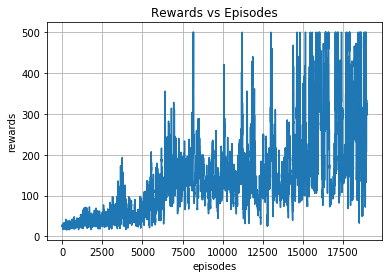

In [6]:
plot_graph("episodes", "rewards", dqn_agent1.hist_rewards, "Vanila DQN", takeMean=True)


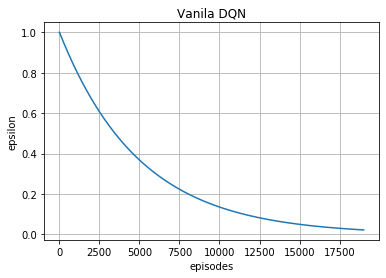

In [7]:
plot_graph("episodes", "epsilon", dqn_agent1.hist_epsilon_values, "Vanila DQN", takeMean=False)


# Double DQN

In [10]:
ddqn_agent1 = DDQNAgent_0c(env_name)

In [11]:
ddqn_agent1.train_agent(episodes_total=total_episodes, epsilon_decay = epsilon_decay, render = render_while_training)

Episode: 19000/19000 | Epsilon: 0.02241 | Reward: 701
Model has finished training. Use test_agent() function to test.


In [ ]:
ddqn_agent1.test_agent(render = render_while_testing)

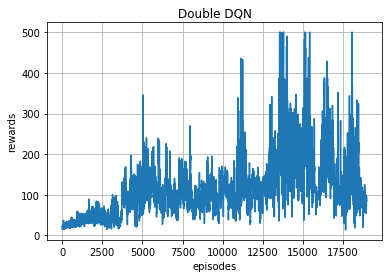

In [13]:
plot_graph("episodes", "rewards", ddqn_agent1.hist_rewards, "Double DQN", takeMean=True)


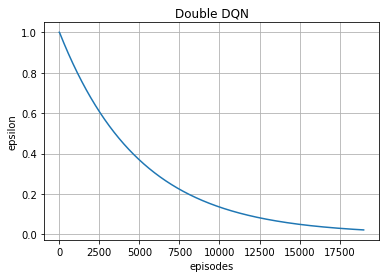

In [14]:
plot_graph("episodes", "epsilon", ddqn_agent1.hist_epsilon_values, "Double DQN", takeMean=False)


# A2C

In [15]:
a2c_agent = A2CAgent_0c(env_name, 495)

In [16]:
a2c_agent.train_agent(1500)

A2C Agent Training ended at episode 441 for CartPole-v1 environment as agent performed best in last 10 runs


In [17]:
a2c_agent.test_agent(test_runs)

A2C Agent's High Score on CartPole-v1 Environment in 5 runs: 500 


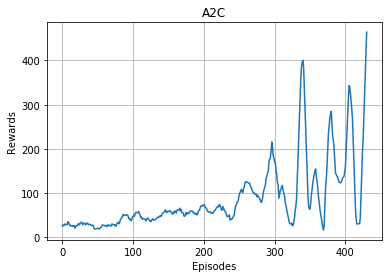

In [19]:
plot_graph("Episodes", "Rewards", a2c_agent.hist_rewards, "A2C", True)


# Reinforce

In [20]:
reinforce_agent = ReinforceAgent_0c(env_name, 495)

/Users/utkarsh/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [21]:
reinforce_agent.train_agent(1500)

REINFORCE Agent Training ended at episode 730 for CartPole-v1 environment as agent performed best in last 10 runs


In [22]:
reinforce_agent.test_agent(test_runs)

REINFORCE Agent's High Score on CartPole-v1 Environment in 5 runs: 500 


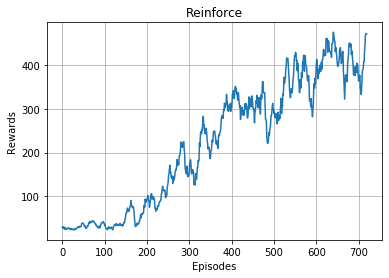

In [24]:
plot_graph("Episodes", "Rewards", reinforce_agent.hist_rewards, "Reinforce", True)
